In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import seaborn as sns
import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('experiments/0070_ResNet3D_18_K400_BC_FragmentedHeart_2MNM_federated_masktexture_1e-5earlyLR')
# exp_path = Path().absolute().parent.parent.joinpath('experiments/0067_ResNet3D_18_K400_BC_FragmentedHeart_2MNM_federated_justmask_1e-7earlyLR')
# exp_path = Path().absolute().parent.parent.joinpath('experiments/0008_ResNet3D_18_K400_withaugmentation_BC_1ch')
# exp_path = Path().absolute().parent.parent.joinpath('experiments/0072_ResNet3D_18_K400_BC_FragmentedHeart_2MNM1ACDC_federated_masktexture_1e-5earlyLR_roinorm')
# exp_path = Path().absolute().parent.parent.joinpath('experiments/0071_ResNet3D_18_K400_BC_FragmentedHeart_2MNM_federated_masktexture_1e-5earlyLR_roinorm')
# exp_path = Path().absolute().parent.parent.joinpath('experiments/X0007_ResNet3D_18_K400_BC_FragmentedHeart_2MNM_federated_justmask_1e-6earlyLR')
# exp_path = Path().absolute().parent.parent.joinpath('experiments/0068_ResNet3D_18_K400_BC_FragmentedHeart_2MNM_federated_mask&texture_1e-7earlyLR')
# exp_path = Path().absolute().parent.parent.joinpath('experiments/0052_ResNet3D_18_K400_BC_1ch_Centralized_FragmentedHeart_2MNM_federated_justmask')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0093_3D_centersSD_federated_1e-5earlyLR_shapeAugs')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0097_3D_centersVSDSA_centralized_1e-5earlyLR_shapeAugs')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0088_3D_centersVSS_centralized_1e-5earlyLR_noAugs')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0084_AugmentationExperiments_ResNet3D_18_K400_BC_2MNM_centralized_1e-5earlyLR_shapeAugs')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0093_3D_centersVSDSA_federated_1e-5earlyLR_shapeAugs')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0121_3D_centersVSSA_FL_noAugs')

In [3]:
pickle_file = 'variables/log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    train_val_losses = pickle.load(handle)

In [4]:
train_val_losses.keys()

dict_keys(["folds_indices_Vall d'Hebron", 'folds_indices_Sagrada Familia', 'folds_indices_ACDC', 'folds_indices_SantPau', 'next_fold', 'test_predictions', 'final_train', 'final_val', 'final_confusion_matrices', 'sample_batch', 'val_predictions_SantPau', "confusion_matrix_Vall d'Hebron", "test_predictions_Vall d'Hebron", 'confusion_matrix_Sagrada Familia', 'test_predictions_Sagrada Familia', 'confusion_matrix_ACDC', 'test_predictions_ACDC', 'confusion_matrix_SantPau', 'test_predictions_SantPau'])

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [7]:
np.array(train_val_losses['final_confusion_matrices']).shape

(5, 2, 2)

In [12]:
tenfolds[:,-1]

array([0.82      , 0.67      , 0.70166667, 0.78833333, 0.6725    ])

In [13]:
# std_final_train = np.std(np.array(train_val_losses['final_train']), 0)
# std_final_val = np.std(np.array(train_val_losses['final_val']), 0)
# std_final_accuracy_t = np.std(np.array(train_val_losses['final_accuracy_t']), 0)
# std_final_accuracy_v = np.std(np.array(train_val_losses['final_accuracy_v']), 0)

In [14]:
# final_train = np.mean(np.array(train_val_losses['final_train']), 0)
# final_val = np.mean(np.array(train_val_losses['final_val']), 0)
# final_accuracy_t = np.mean(np.array(train_val_losses['final_accuracy_t']), 0)
# final_accuracy_v = np.mean(np.array(train_val_losses['final_accuracy_v']), 0)

In [15]:
# print(f'Train, Validation: {round(final_accuracy_t[-1],3)}+/-{round(std_final_accuracy_t[-1],3)}, {round(final_accuracy_v[-1],3)}+/-{round(std_final_accuracy_v[-1],3)}, {-1}')
# # print(f'Stdev Train: {std_final_accuracy_t[-1]}, Validation: {std_final_accuracy_v[-1]}')

Train, Validation: 1.0+/-0.001, 0.73+/-0.062, -1


In [16]:
# best_epoch = 90+final_accuracy_v[90:].argmax()
# print(f'Train, Validation, Epoch: {round(final_accuracy_t[best_epoch],3)}+/-{round(std_final_accuracy_t[best_epoch],3)}, {round(final_accuracy_v[best_epoch],3)}+/-{round(std_final_accuracy_v[best_epoch],3)}, {best_epoch}')
# # print(f'Stdev Train: {std_final_accuracy_t[best_epoch]}, Validation: {std_final_accuracy_v[best_epoch]}')

Train, Validation, Epoch: 1.0+/-0.001, 0.738+/-0.055, 92


## Confusion Matrix

In [8]:
confusion_matrices = np.array(train_val_losses['final_confusion_matrices']) 
confusion_matrices.shape # (folds, epochs, h, w)

(5, 2, 2)

In [11]:
avg_cmatrix_across_folds = np.sum(confusion_matrices,0)

<AxesSubplot:>

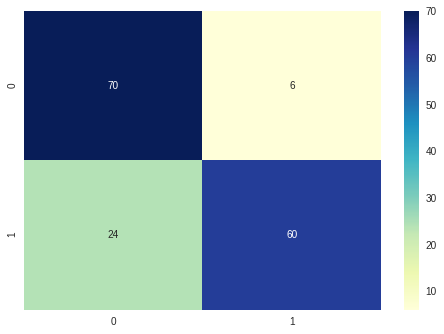

In [12]:
sns.heatmap(avg_cmatrix_across_folds, annot=True,  cmap="YlGnBu")

## Performance across folds

In [26]:
final_accuracy_v[-1]

0.7305

In [27]:
steps = range(len(final_train))

In [28]:
train_performances = final_train #train_val_losses['train_losses']
val_performances = final_val #train_val_losses['val_losses']
train = np.array(train_performances)#[1:])
val = np.array(val_performances)#[1:])

In [29]:
y1,y2,x = train.squeeze()[:steps[-1]+1], val.squeeze()[:steps[-1]+1], steps

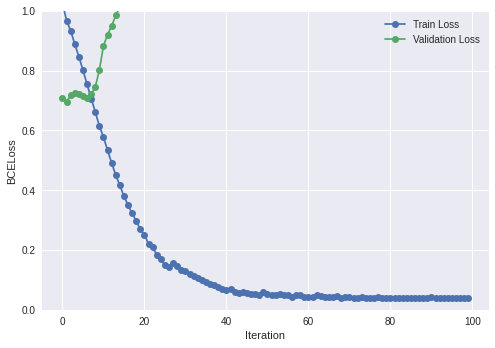

In [30]:
plt.plot(x,y1,'-o', label='Train Loss')
plt.plot(x,y2,'-o', label='Validation Loss')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.savefig(exp_path.joinpath('variables/learning_curve.png'))

In [31]:
train_performances = final_accuracy_t #train_val_losses['train_losses']
val_performances = final_accuracy_v #train_val_losses['val_losses']
train = np.array(train_performances)#[1:])
val = np.array(val_performances)#[1:])
y1,y2,x = train.squeeze()[:steps[-1]+1], val.squeeze()[:steps[-1]+1], steps

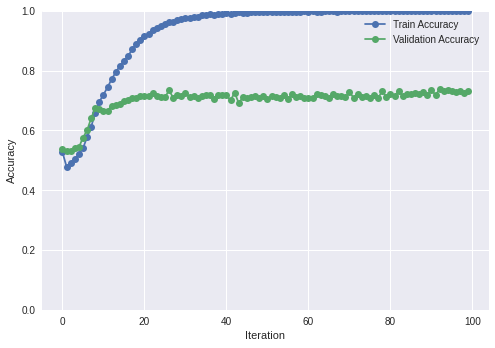

In [32]:
plt.plot(x,y1,'-o', label='Train Accuracy')
plt.plot(x,y2,'-o', label='Validation Accuracy')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.savefig(exp_path.joinpath('variables/learning_curve_accuracy.png'))